In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
dict_mes = {"Janeiro":"01",
            "Fevereiro":"02",
           "Mar�o":"03",
           "Abril":"04",
           "Maio":"05",
           "Junho":"06",
           "Julho":"07",
           "Agosto":"08",
           "Setembro":"09",
           "Outubro":"10",
           "Novembro":"11",
           "Dezembro":"12"}

In [4]:
df = pd.read_csv("Incendio.csv", sep = "\\t", decimal = '.')

df['Ano'] = [(df['Ano'][i].split('"'))[1] for i in range(len(df))]
df['Periodo'] = [(df['Periodo'][i].split('"'))[0] for i in range(len(df))]

df["Periodo"] = [str(df["Periodo"][i])[:3] + dict_mes[df["Mes"][i]] + str(df["Periodo"][i])[5:] for i in range(len(df))]


In [5]:
df

,Ano,Estado,Mes,Numero,Periodo
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,01/12/2012
6450,2013,Tocantins,Dezembro,85,01/12/2013
6451,2014,Tocantins,Dezembro,223,01/12/2014
6452,2015,Tocantins,Dezembro,373,01/12/2015


In [6]:
df["Mes"] = [dict_mes[df["Mes"][i]] for i in range(len(df))]

In [7]:
df = df[["Ano", "Mes", "Numero"]]
agrupo = df.groupby(['Ano', 'Mes']).sum()
agrupo = agrupo.reset_index()

In [ ]:
if not os.path.exists('dados'):
    os.makedirs('dados')
    os.makedirs('dados/espaco_freq')
    os.makedirs('dados/espaco_tempo')
if not os.path.exists('resultados'):
    os.makedirs('resultados')
    os.makedirs('resultados/espaco_freq')
    os.makedirs('resultados/espaco_tempo')
    os.makedirs('resultados/imagens')
    os.makedirs('resultados/residuos')

In [8]:
#----------------------------------------#
# Tratamento dos dados separados por mes #
#----------------------------------------#

In [9]:
agrupo.Numero.to_csv(f"dados/espaco_tempo/dados_gerais.csv", header=False)
mes = [agrupo.loc[agrupo['Mes'] == str(i).zfill(2)].reset_index() for i in range(1,13)]
for i in range(1, 13):
    mes[i-1].Numero.to_csv(f"dados/espaco_tempo/mes_{i}.csv", header=False)


In [10]:
for i in range(1, 13):
    dado = pd.read_csv(f'dados/espaco_tempo/mes_{i}.csv', header=None, index_col=0)
    t = np.arange(len(dado))
    freq = np.fft.fftfreq(t.shape[-1])
    dado_freq = np.fft.fft(dado[1])
    dataframe = pd.DataFrame({'x': freq, 'y_real': dado_freq.real, 'y_imag': dado_freq.imag})
    dataframe.to_csv(f'dados/espaco_freq/mes_{i}.csv', header=False)



In [11]:
# Rodar main.m do octave para gerar os resultados

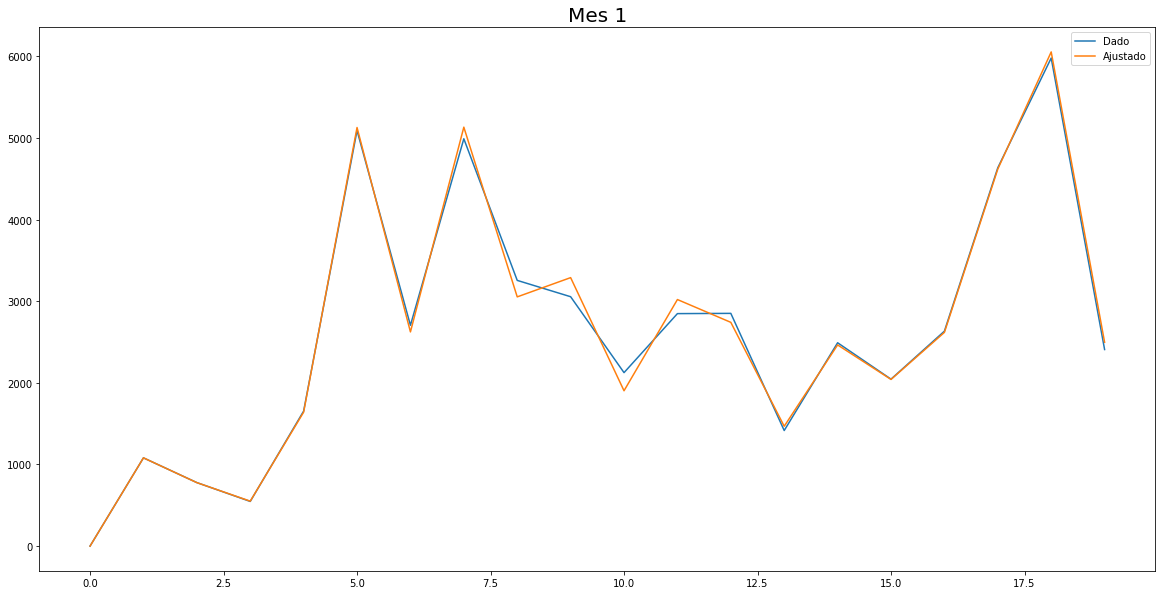

482.08404493093144


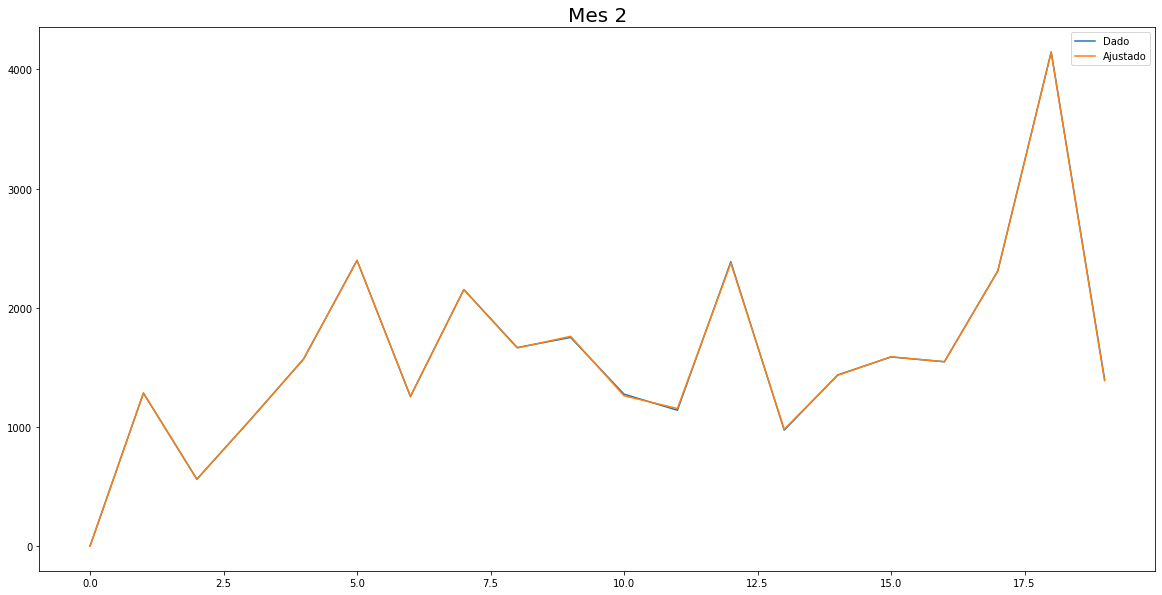

29.271665398067505


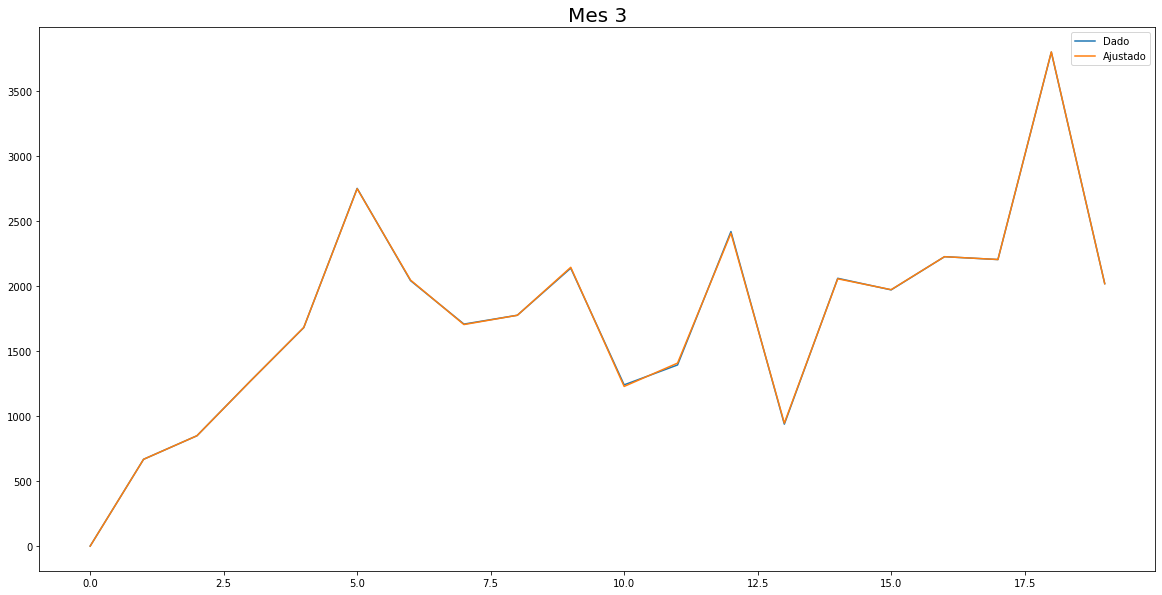

25.6656578359459


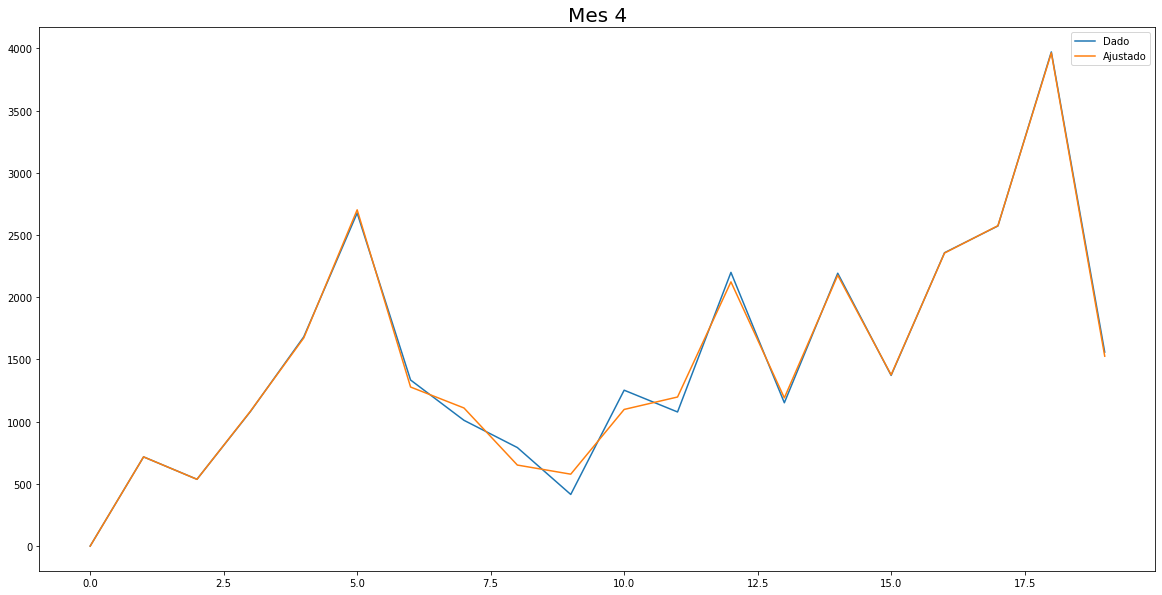

327.62703584663655


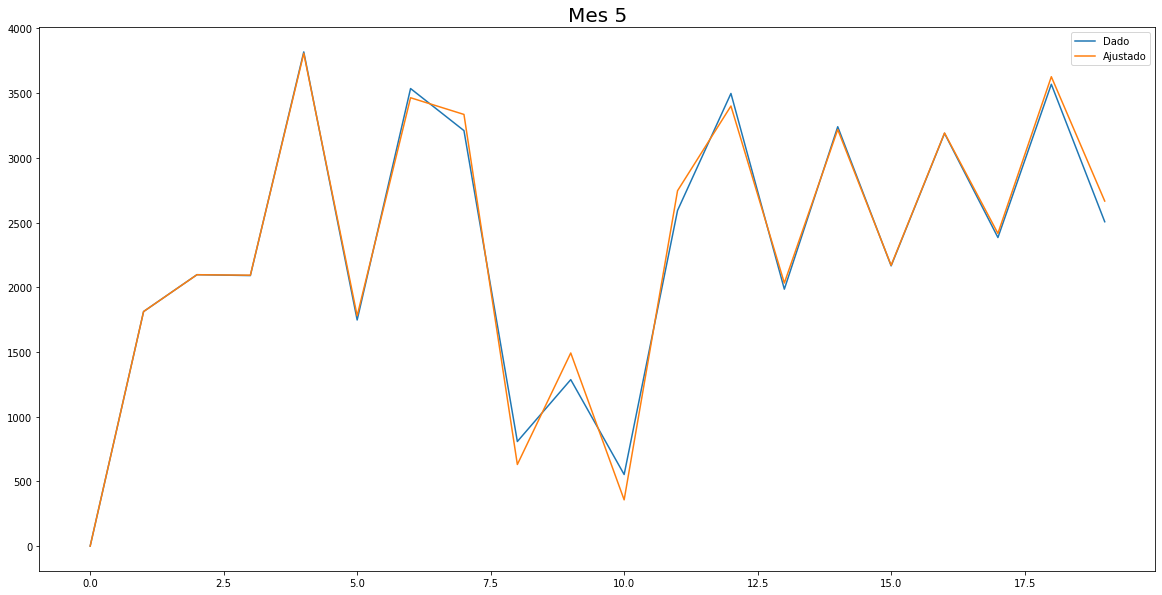

446.533567530109


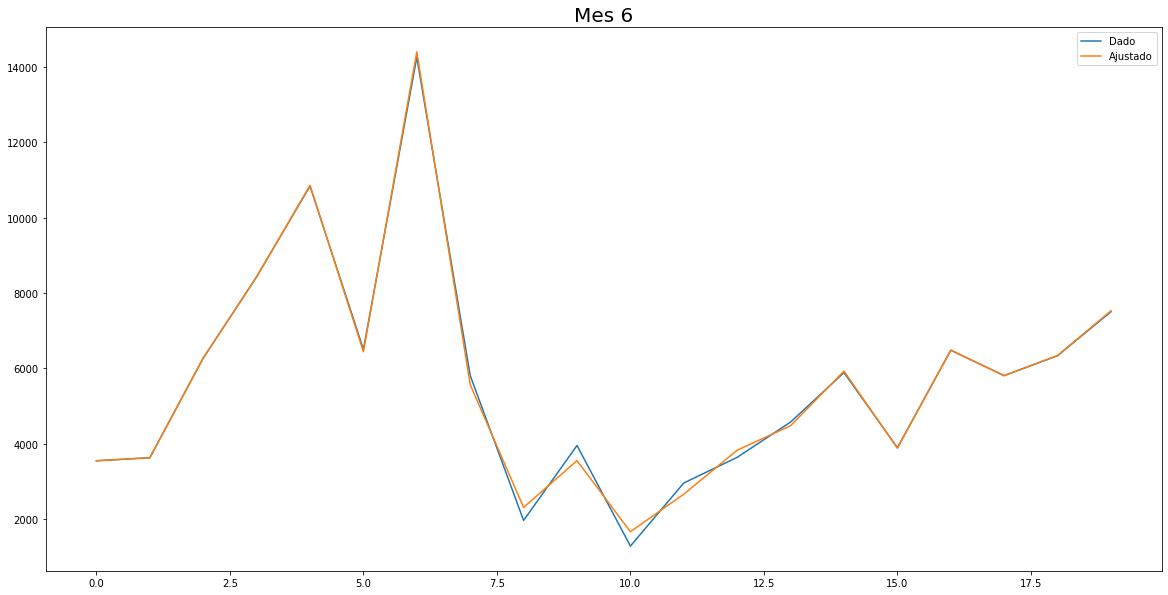

802.0149531605185


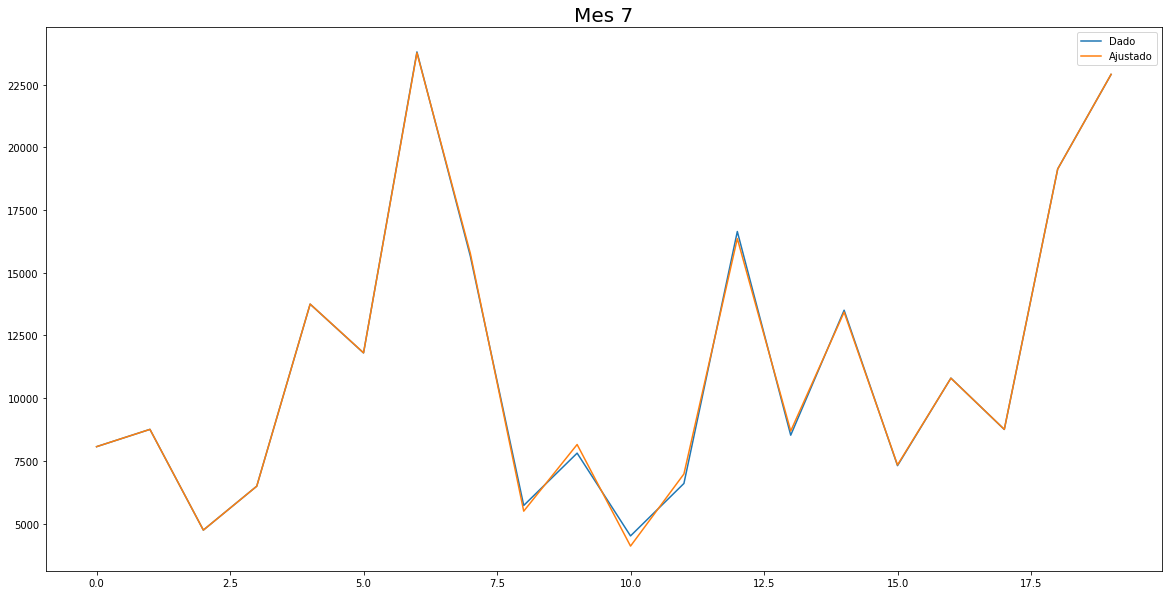

778.0204700207514


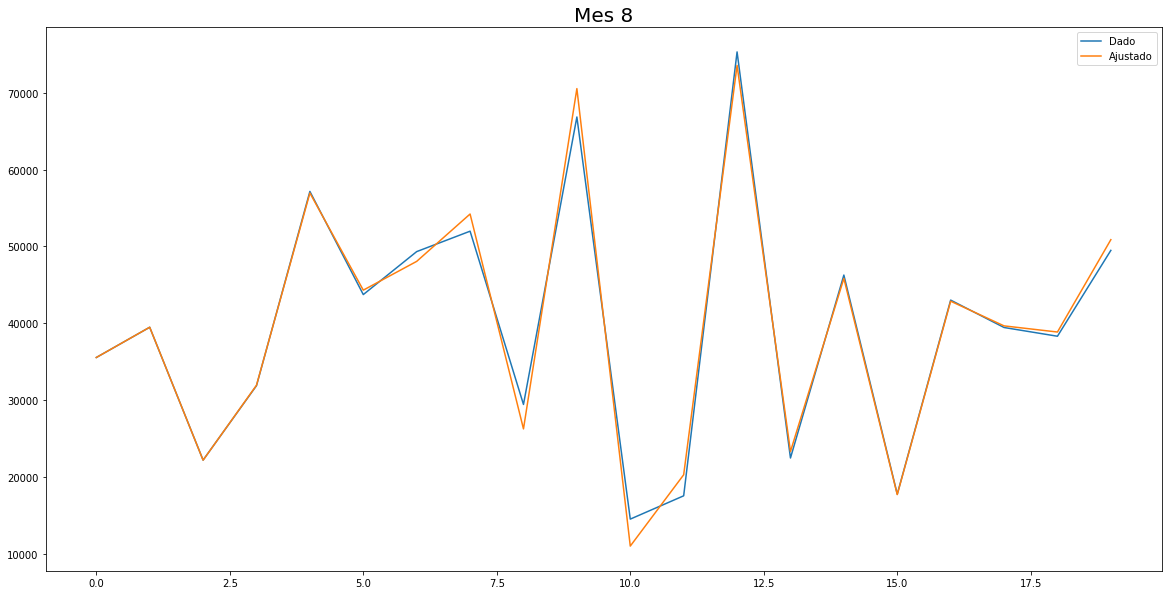

7536.781096371677


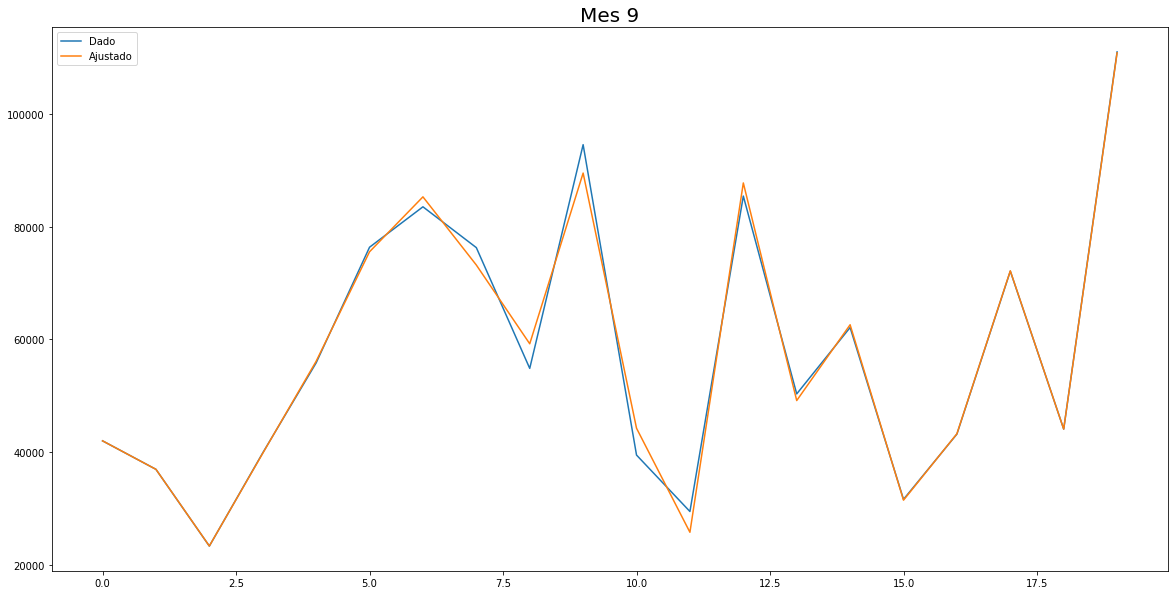

10060.370456600602


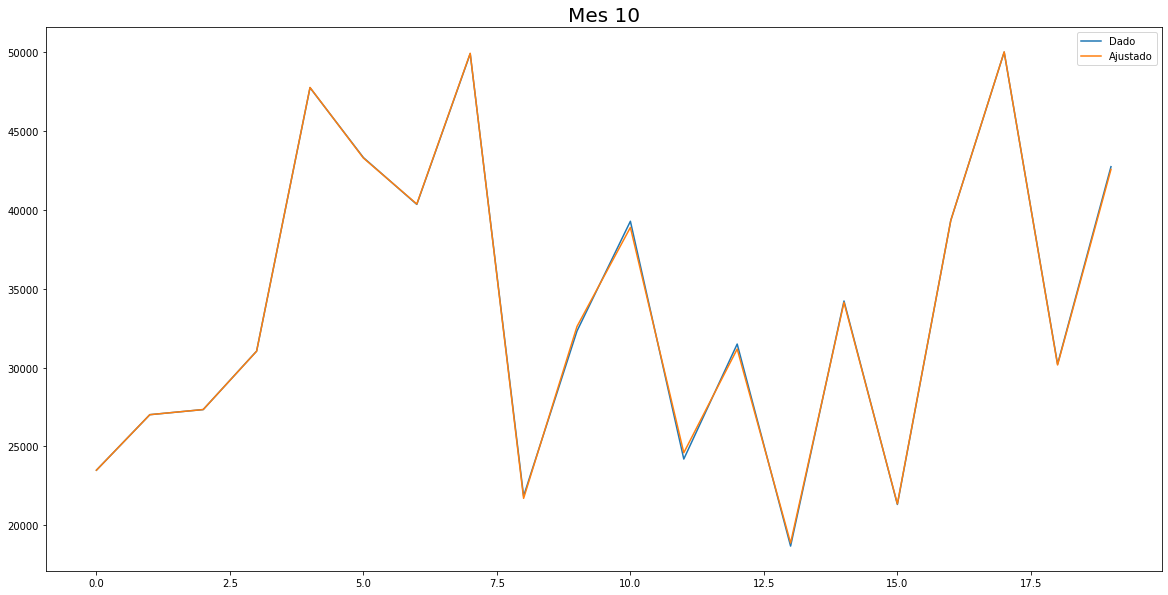

771.218152893546


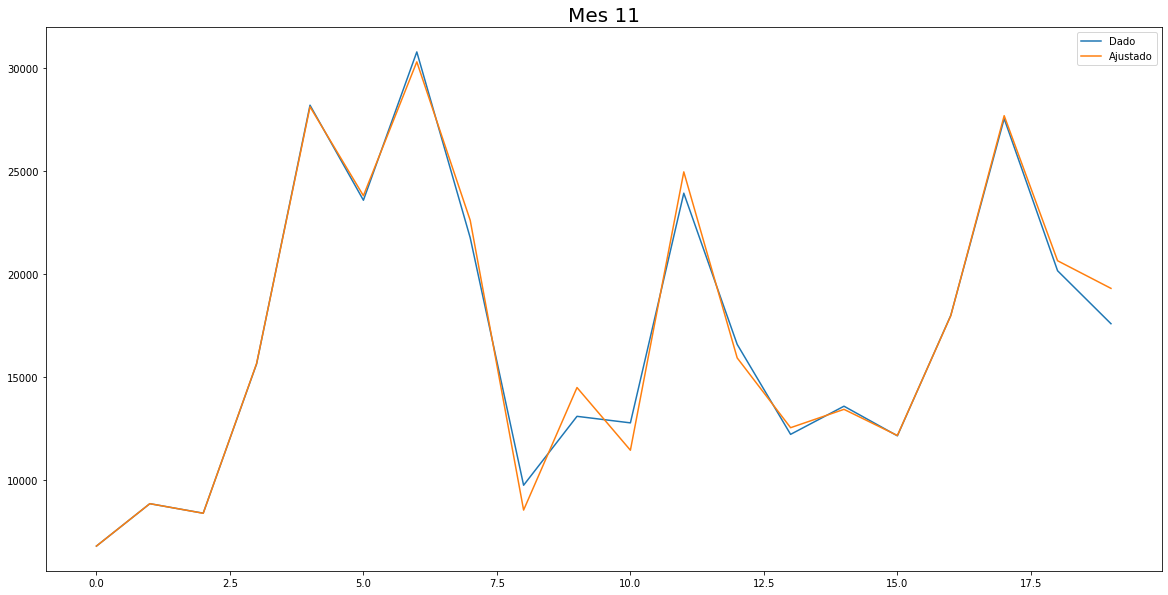

3313.622149564739


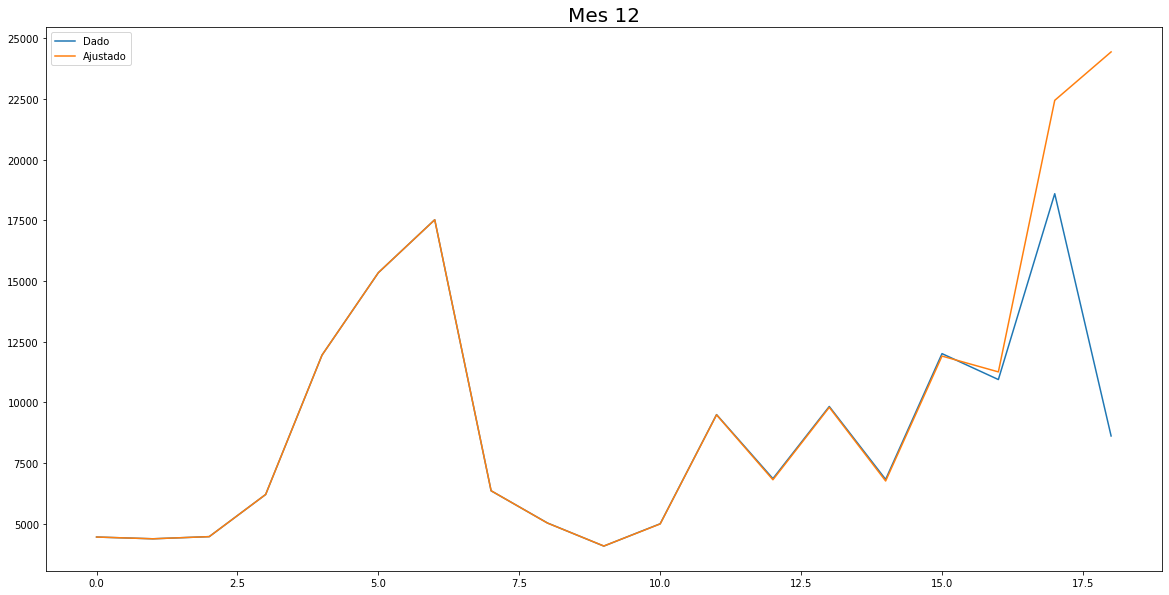

16290.428611313957


In [12]:
for i in range(1,13):
    dado = pd.read_csv(f'dados/espaco_tempo/mes_{i}.csv', header=None, index_col=0)
    resultado = pd.read_csv(f'resultados/espaco_tempo/mes_{i}.csv', header=None, index_col=0)
    dado_np = dado[1].to_numpy()
    resultado_np = resultado[1].to_numpy()

    plt.figure(figsize = (20,10))
    plt.plot(dado.index, dado[1])
    plt.plot(resultado.index, resultado[1])

    plt.title(f"Mes {i}", fontsize = 20)
    plt.legend(["Dado", "Ajustado"])
    plt.savefig(f"resultados/imagens/mes_{i}_tempo.png")
    plt.show()
    try:
        print(np.linalg.norm(dado_np - resultado_np))
    except ValueError:
        print(np.linalg.norm(dado_np - resultado_np[:-1]))
        

In [13]:
# Rodar main_freq.m do octave para gerar os resultados

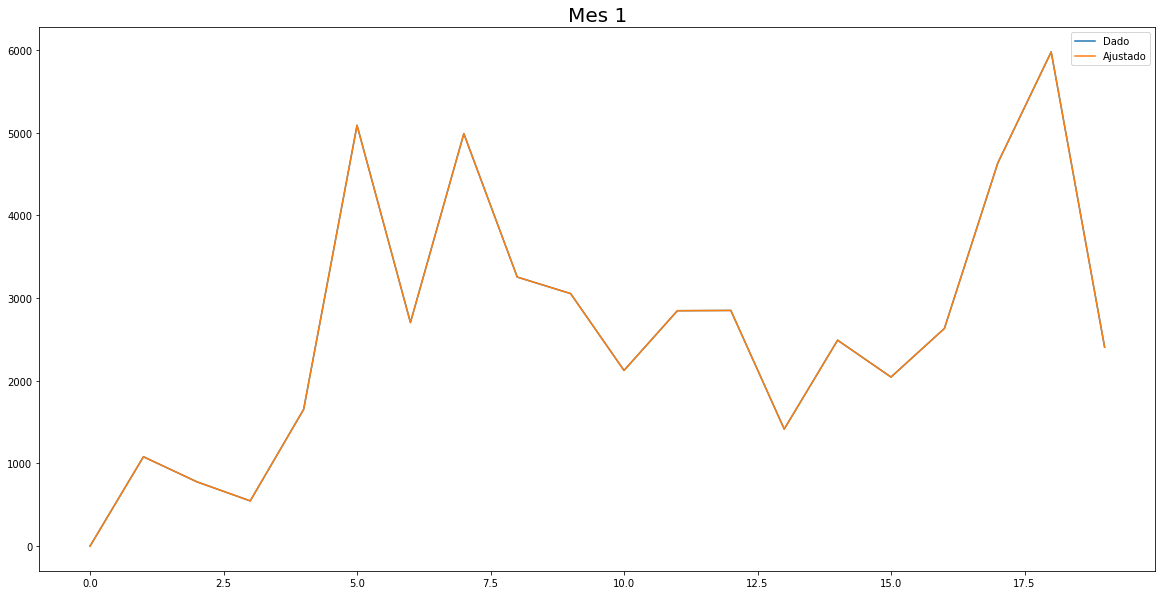

0.00012930500487039111


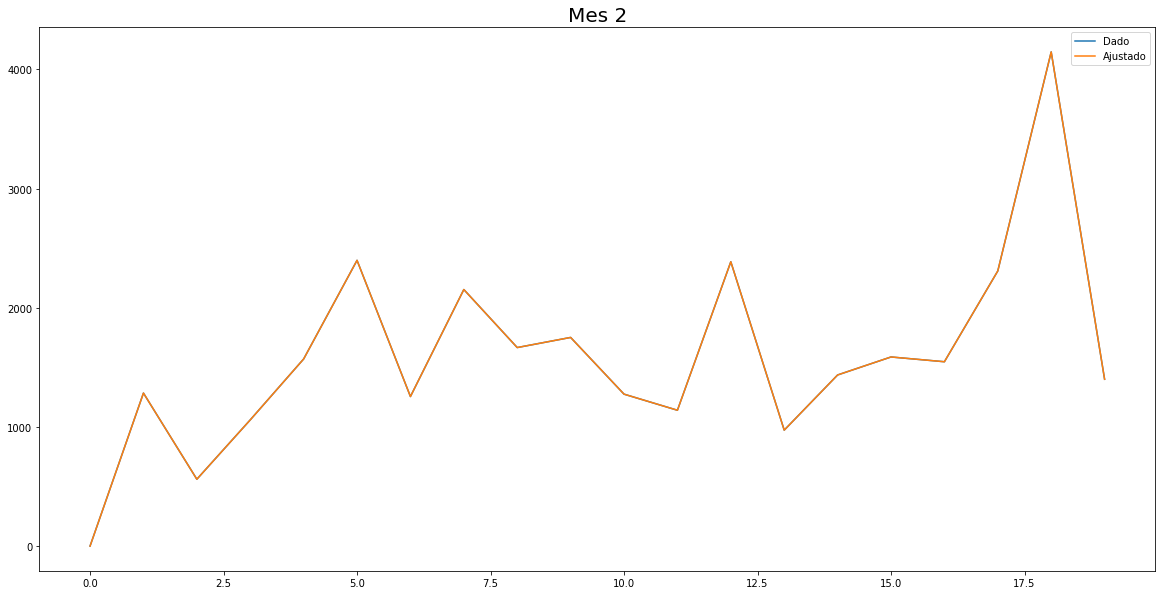

5.6329807563703535e-06


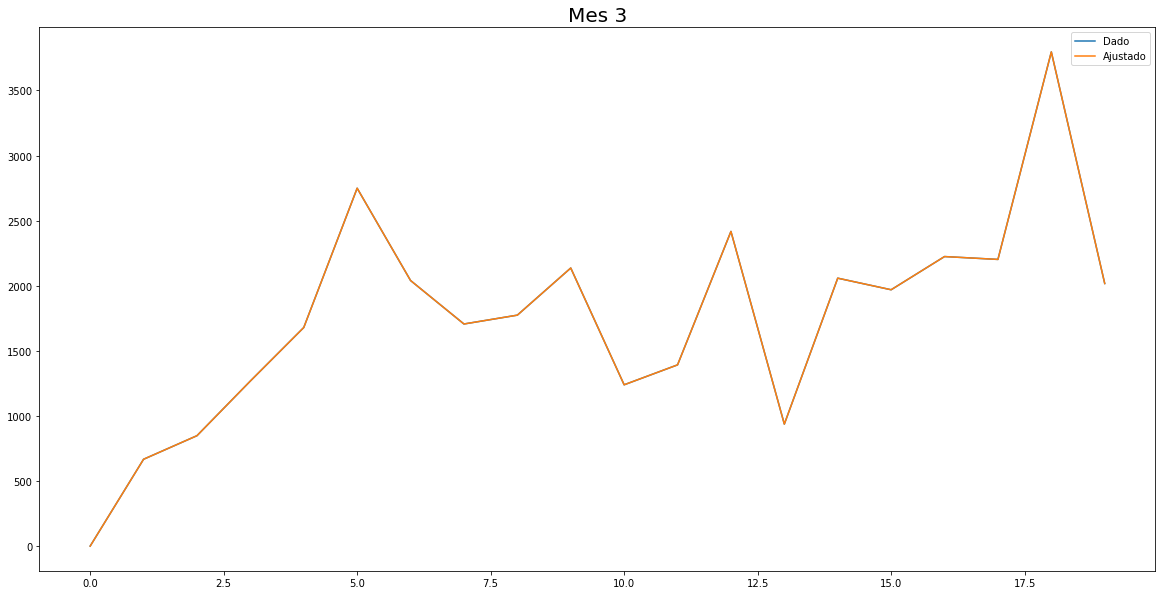

7.722515573381951e-05


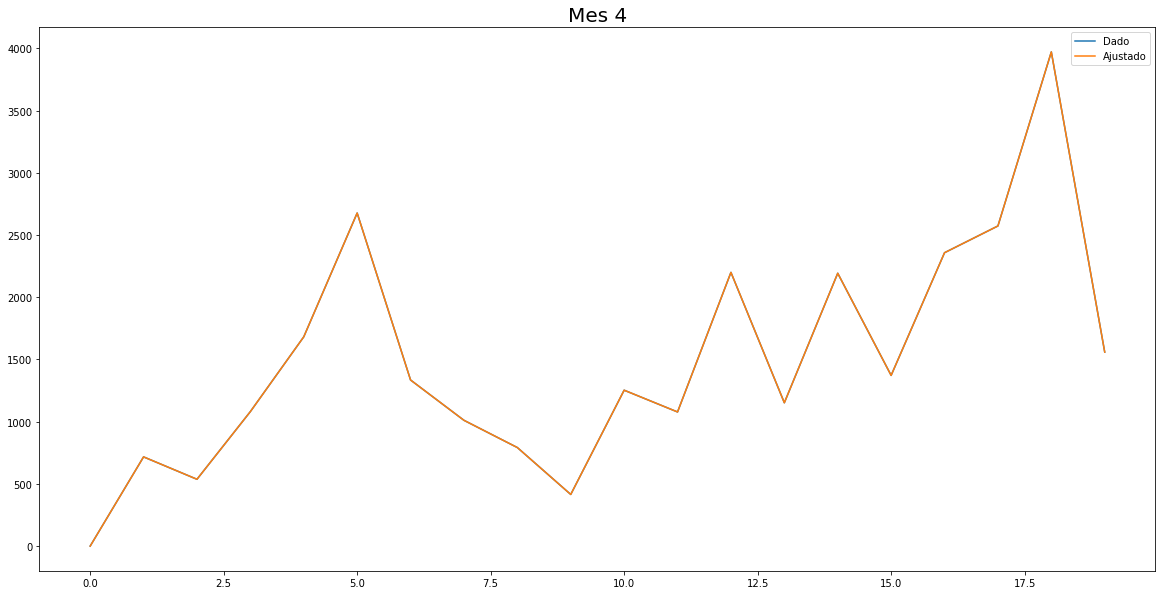

4.878503949617778e-05


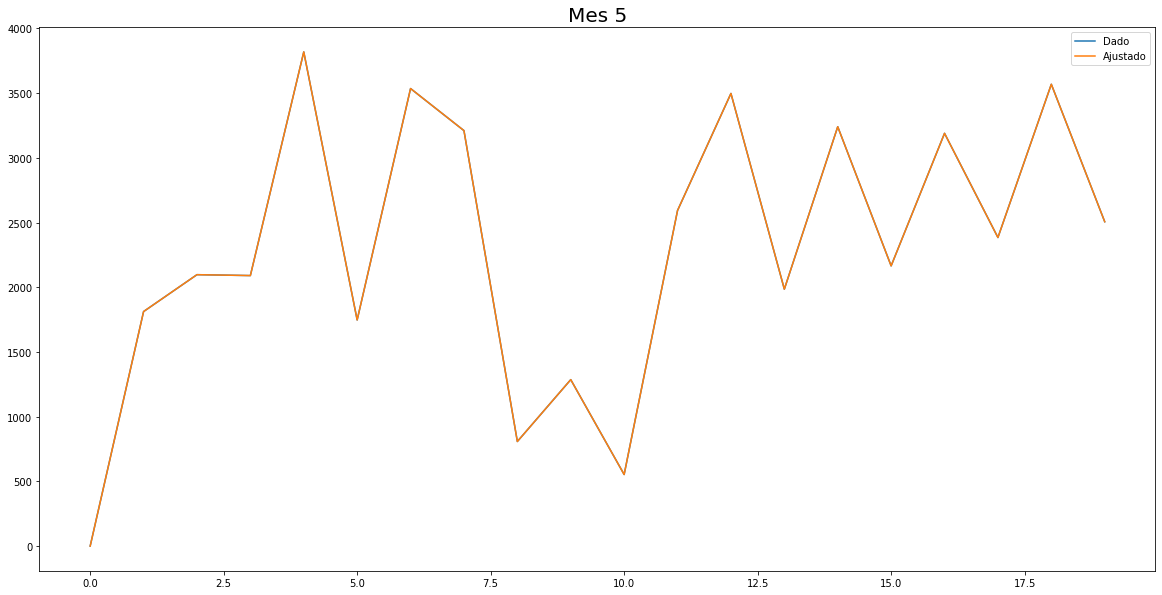

2.0260247417213283e-05


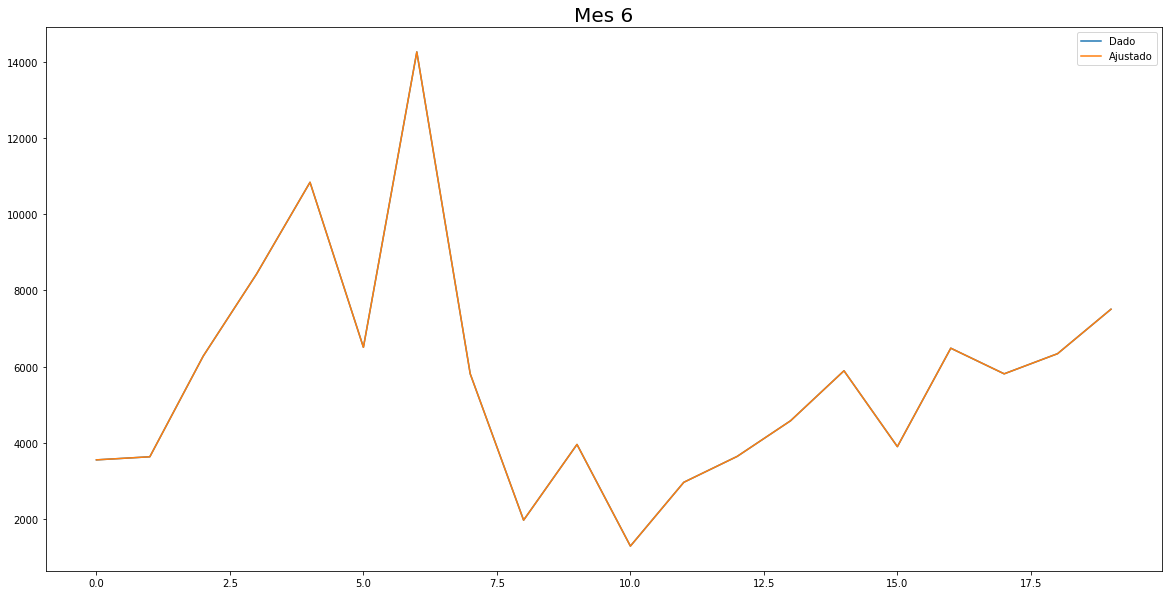

9.573554428559478e-05


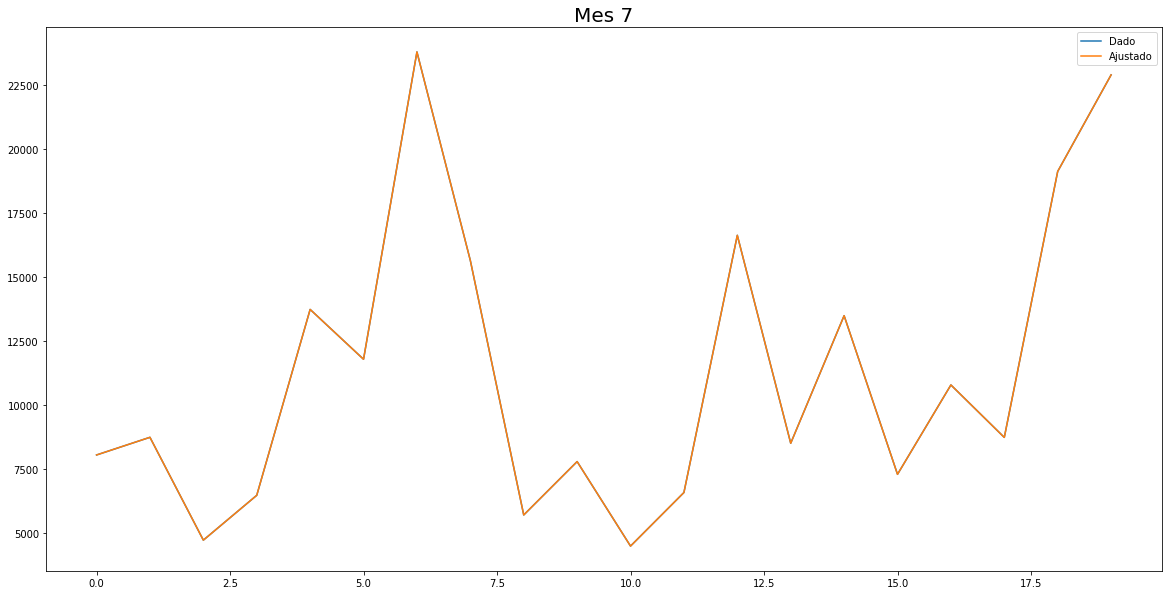

0.0003766752267519946


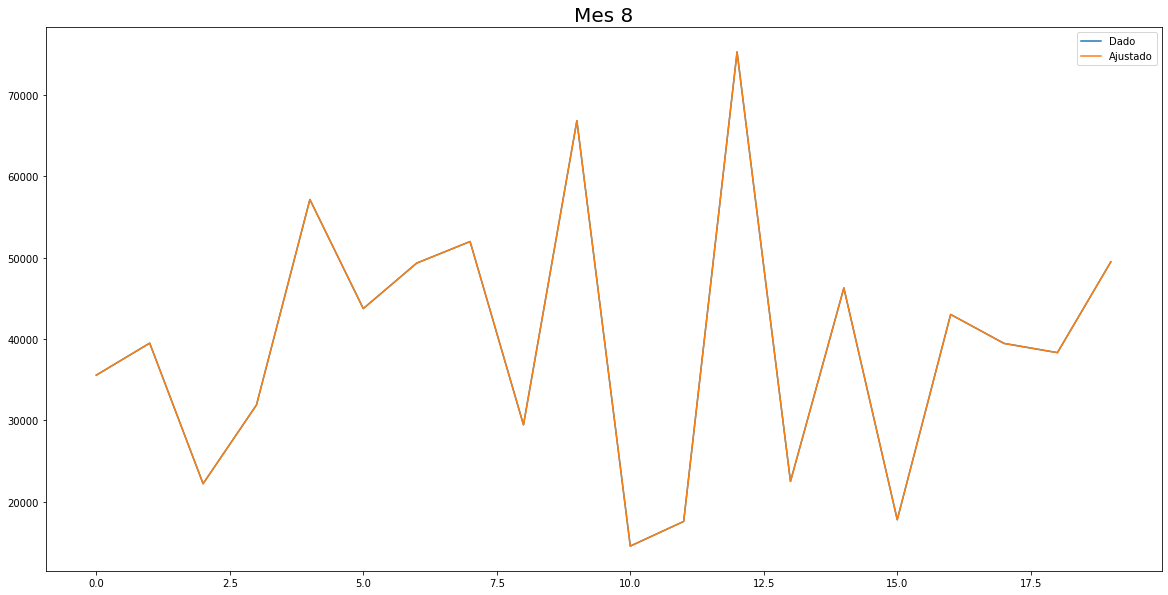

0.0005979916916176284


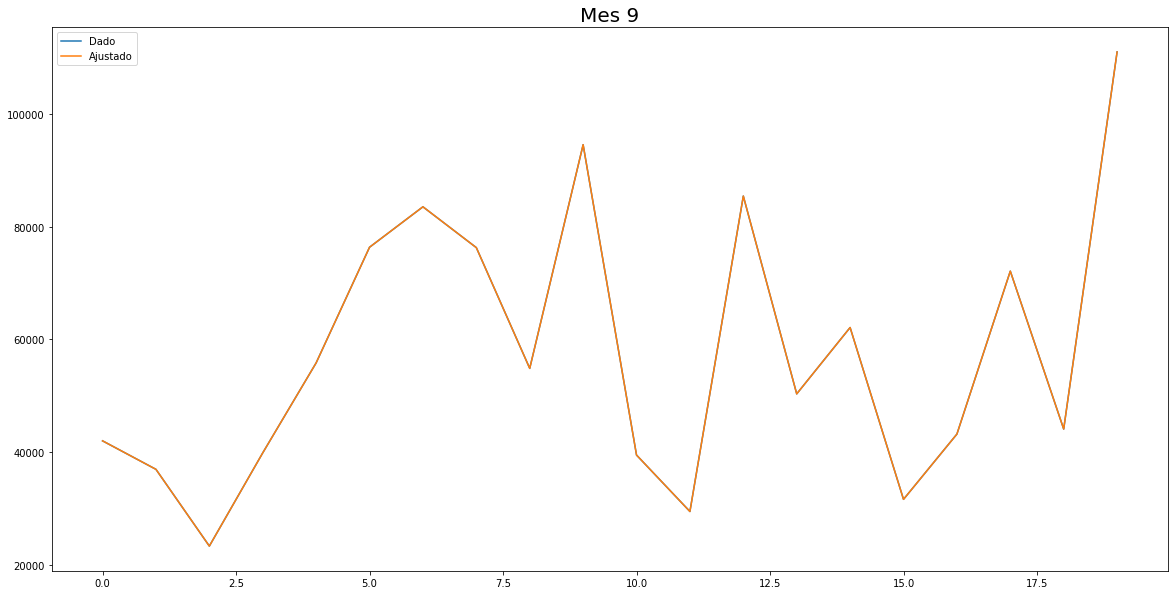

0.0008652981790370295


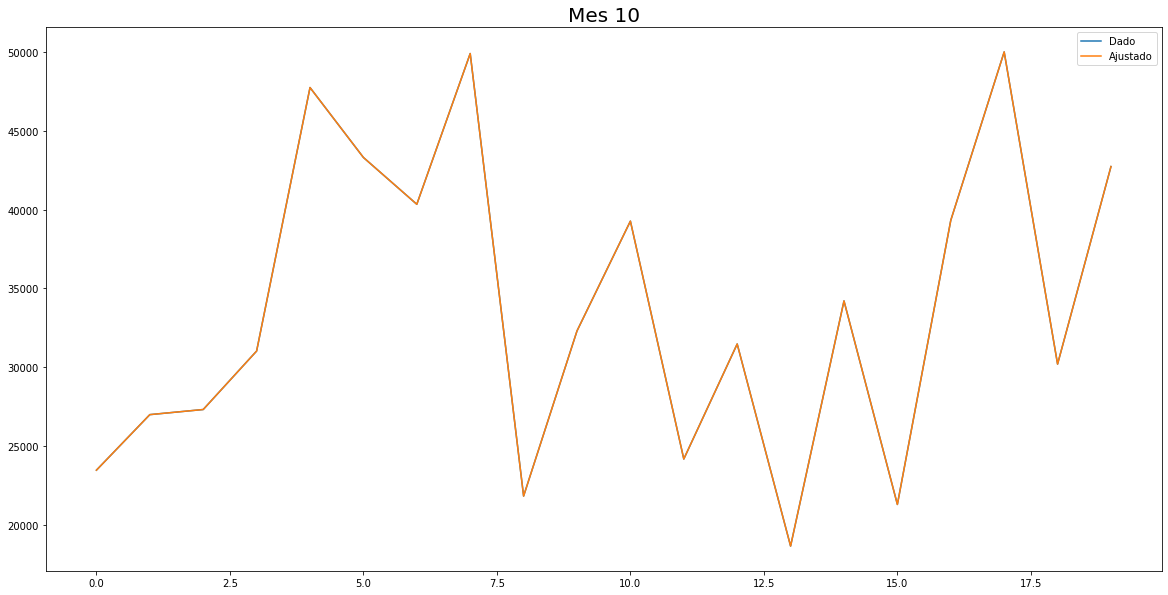

0.0005659701136173891


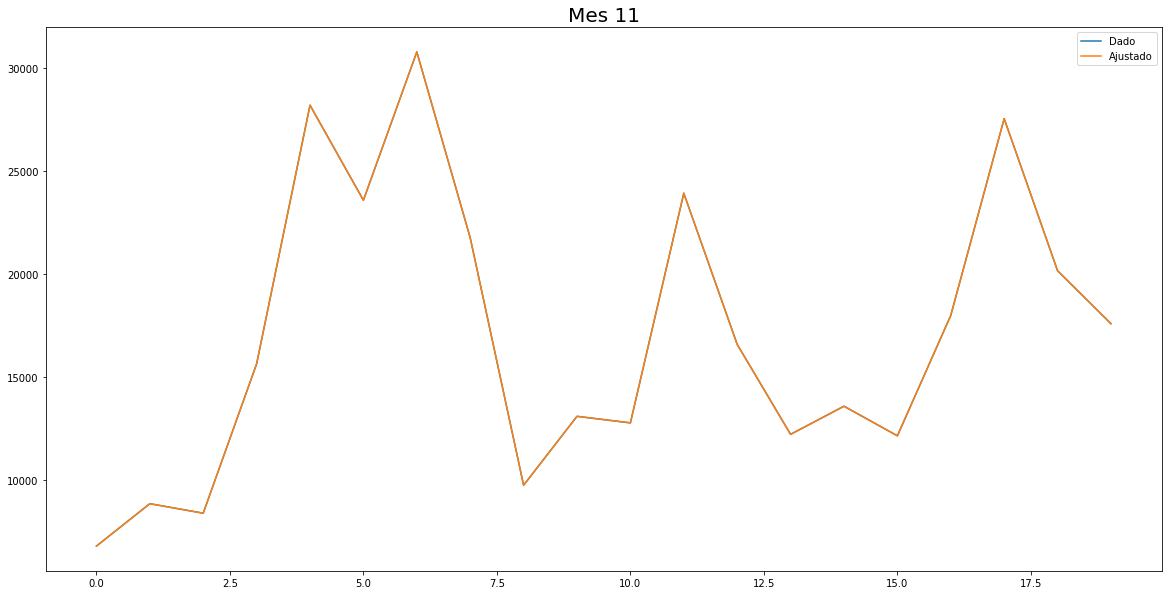

0.0001754774867037628


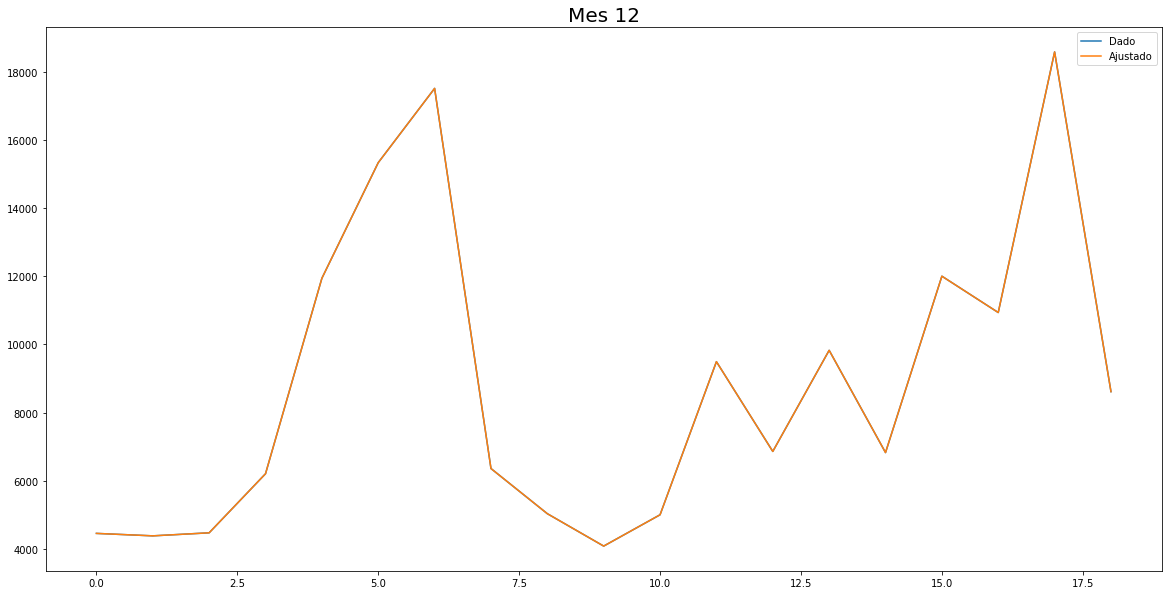

7.526239118153195e-05


In [14]:

for i in range(1, 13):
    dado = pd.read_csv(f'dados/espaco_tempo/mes_{i}.csv', header=None, index_col=0)
    resultado = pd.read_csv(f'resultados/espaco_freq/mes_{i}.csv', header=None, index_col=0)
    original = dado[1].to_numpy()
    c = np.fft.ifft(resultado[2] + 1j*resultado[3])

    plt.figure(figsize = (20,10))
    plt.plot(dado.index, dado[1])
    plt.plot(dado.index, c)
    
    plt.title(f"Mes {i}", fontsize = 20)
    plt.legend(["Dado", "Ajustado"])
    plt.savefig(f"resultados/imagens/mes_{i}_freq.png")
    plt.show()
    
    print(np.linalg.norm(original - c, 2))


In [15]:
#------------------------------#
# Tratamento de todos os dados #
#------------------------------#

In [16]:
dado = pd.read_csv(f'dados/espaco_tempo/dados_gerais.csv', header=None, index_col=0)
t = np.arange(len(dado))
freq = np.fft.fftfreq(t.shape[-1])
dado_freq = np.fft.fft(dado[1])
dataframe = pd.DataFrame({'x': freq, 'y_real': dado_freq.real, 'y_imag': dado_freq.imag})
dataframe.to_csv(f'dados/espaco_freq/dados_gerais.csv', header=False)


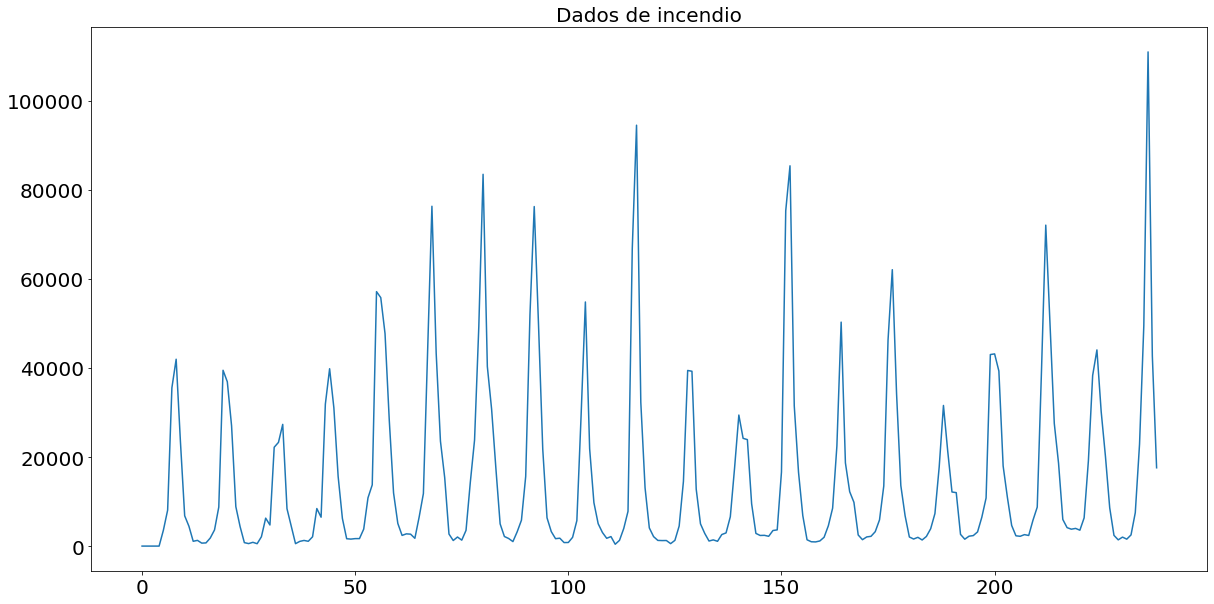

In [17]:

# Plotar os dados analisados
plt.figure(figsize = (20,10))
plt.plot(agrupo.index, agrupo.Numero)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("Dados de incendio", fontsize = 20)

plt.show()

In [18]:
# Rodar main_geral.m no Octave, trocando o nome do arquivo de entrada e saida.

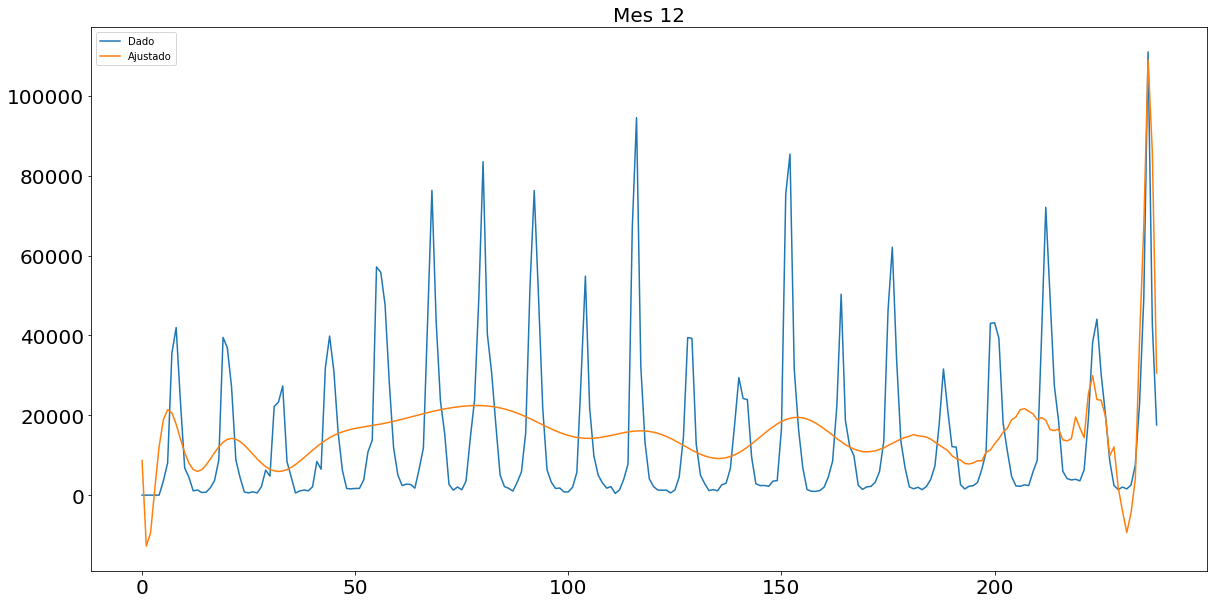

284085.93792102626


In [19]:

dado = pd.read_csv(f'dados/espaco_tempo/dados_gerais.csv', header=None, index_col=0)
resultado = pd.read_csv(f'resultados/espaco_tempo/dados_gerais.csv', header=None, index_col=0)
dado_np = dado[1].to_numpy()
resultado_np = resultado[1].to_numpy()

plt.figure(figsize = (20,10))
plt.plot(dado.index, dado[1])
plt.plot(resultado.index, resultado[1])

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(f"Mes {i}", fontsize = 20)
plt.legend(["Dado", "Ajustado"])
plt.savefig(f"resultados/imagens/dados_gerais_tempo.png")
plt.show()
print(np.linalg.norm(dado_np - resultado_np))

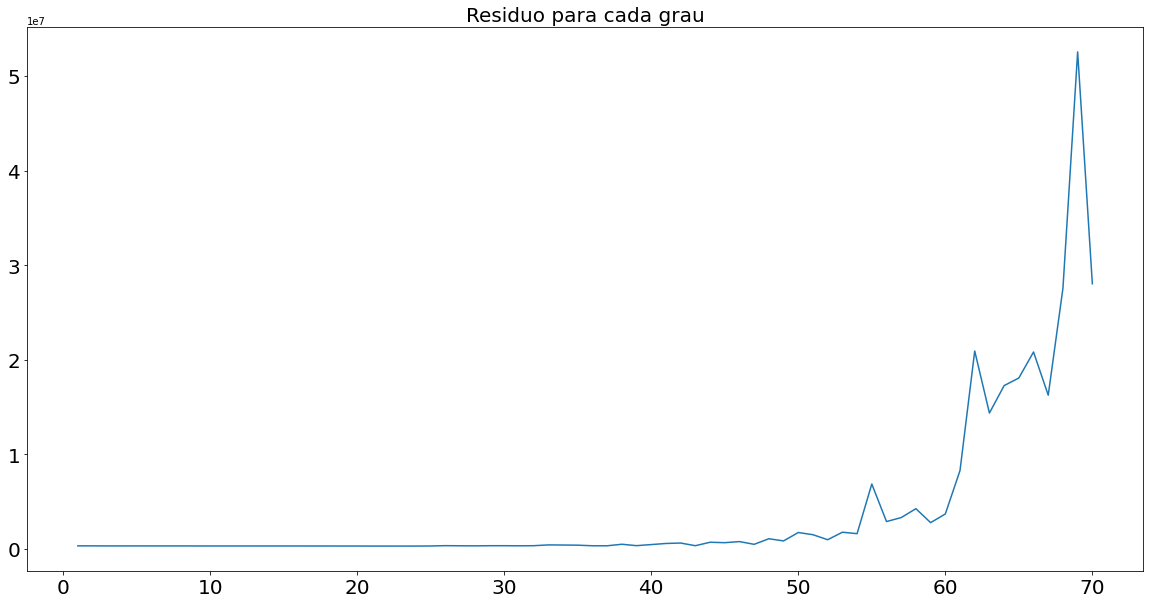

In [20]:

residuos = pd.read_csv(f'residuos_com_grau.csv', header=None, index_col=0)
plt.figure(figsize = (20,10))
plt.plot(residuos.index, residuos[1])

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(f"Residuo para cada grau", fontsize = 20)
plt.savefig(f"resultados/residuos/geral.png")
plt.show()

In [21]:
# Rodar main_geral_freq.m no Octave, trocando o nome do arquivo de entrada e saida.

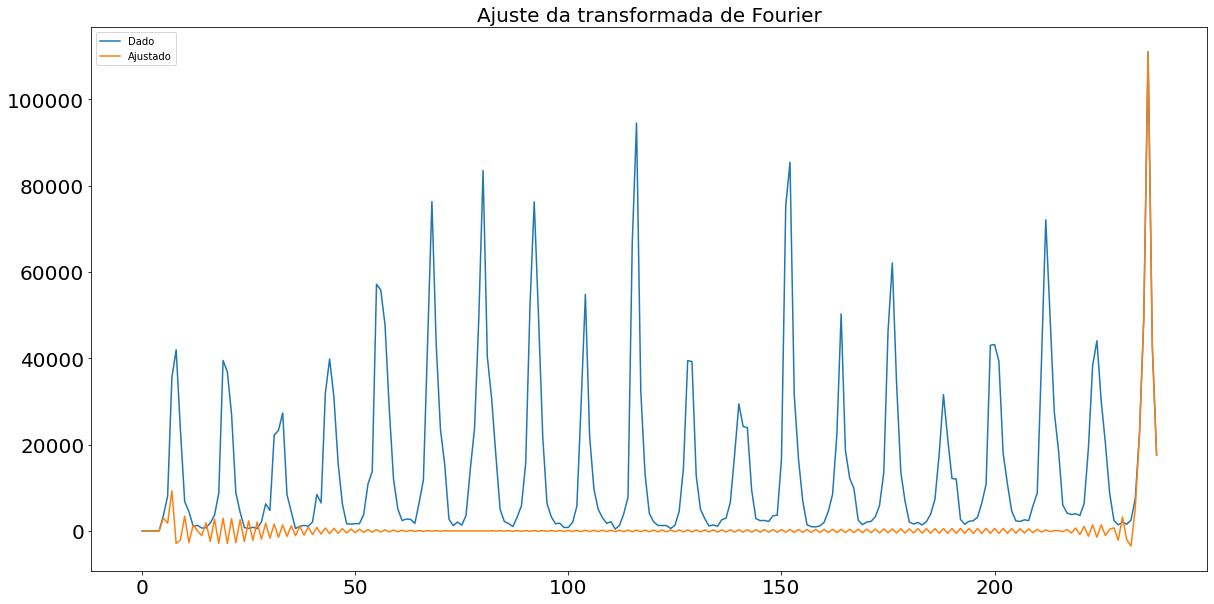

365827.3050632847


In [22]:

dado = pd.read_csv(f'dados/espaco_tempo/dados_gerais.csv', header=None, index_col=0)
resultado = pd.read_csv(f'resultados/espaco_freq/dados_gerais.csv', header=None, index_col=0)
original = dado[1].to_numpy()
c = np.fft.ifft(resultado[2] + 1j*resultado[3])

plt.figure(figsize = (20,10))
plt.plot(dado.index, dado[1])
plt.plot(dado.index, c)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(f"Ajuste da transformada de Fourier", fontsize = 20)
plt.legend(["Dado", "Ajustado"])
plt.savefig(f"resultados/imagens/dados_gerais_freq.png")
plt.show()

print(np.linalg.norm(original - c, 2))